In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("housing_data.csv")

In [4]:
# Display basic information about the dataset
print(data.info())  # Overview of data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(data.head())  # Display the first five row

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

## **Insights from Loading the Dataset**
After loading the dataset, we can derive the following initial insights:

Dataset Overview :
1. The dataset contains 1460 rows and 81 columns. The columns represent different aspects of a house, such as size, location, amenities, and sale price.

2. Data Types :
The dataset includes numerical variables (e.g., LotArea, GrLivArea, SalePrice), which represent continuous values like area in square feet and price.
There are also categorical variables (e.g., MSZoning, Street, Neighborhood), which describe properties with labels instead of number.

The head() function helps us verify that the dataset loaded correctly and shows a glimpse of the first few houses listed in the dataset.
The info() function tells us whether any column has missing or inconsistent data.

# STEP 2: CLEANING THE DATA 

In [8]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64


In [9]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
# Fill missing values for numerical columns with median
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with the most frequent value (mode)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that missing values are handled
print("Missing values after imputation:\n", data.isnull().sum().sum())  # Should be 0

Missing values after imputation:
 0


In [11]:
# Remove duplicate rows
data = data.drop_duplicates()

# Confirm removal
print(f"Number of duplicate rows after cleaning: {data.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


In [12]:
# Remove extreme outliers using the Interquartile Range (IQR) method
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only values within the range
data = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# Check the shape after removing outliers
print(f"Dataset size after handling anomalies: {data.shape}")

Dataset size after handling anomalies: (1399, 81)


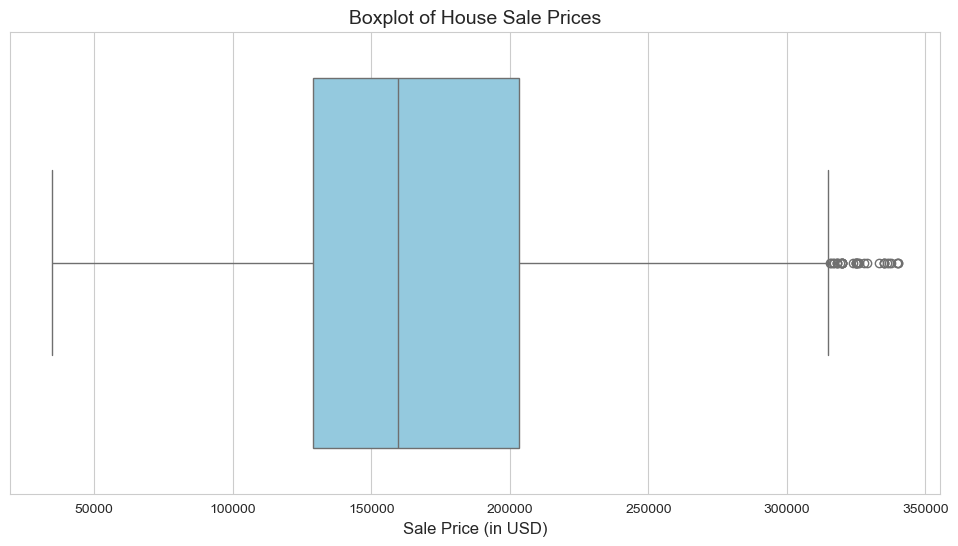

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a pastel color palette for better visualization
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a boxplot to visualize outliers in SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['SalePrice'], color="skyblue")

# Add title and labels for clarity
plt.title("Boxplot of House Sale Prices", fontsize=14)
plt.xlabel("Sale Price (in USD)", fontsize=12)

# Show the plot
plt.show()

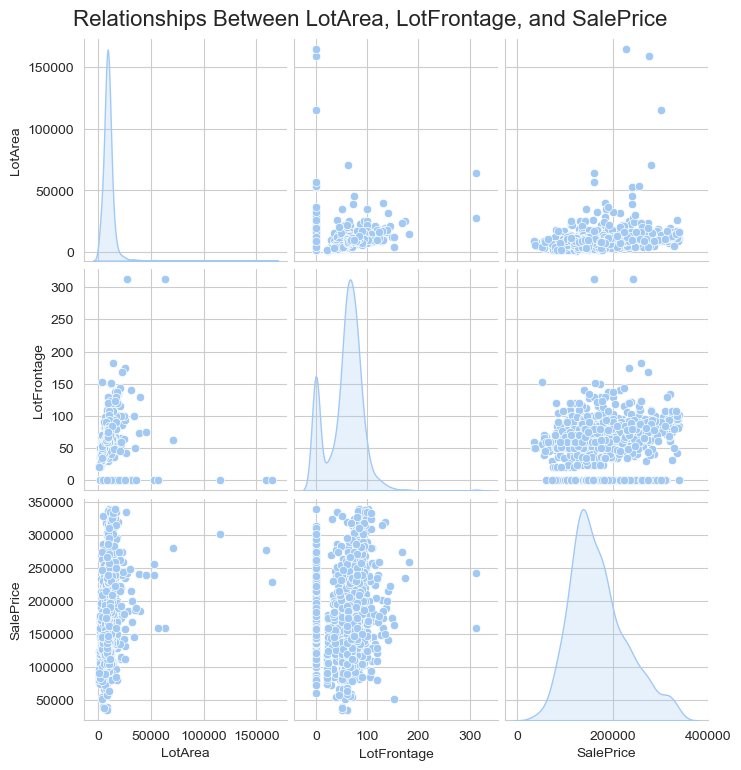

In [14]:
# Define numerical columns to analyze
numerical_columns = ['LotArea', 'LotFrontage', 'SalePrice']

# Pairplot for relationships
sns.pairplot(data[numerical_columns], diag_kind='kde', height=2.5)
plt.suptitle("Relationships Between LotArea, LotFrontage, and SalePrice", y=1.02, fontsize=16)
plt.show()

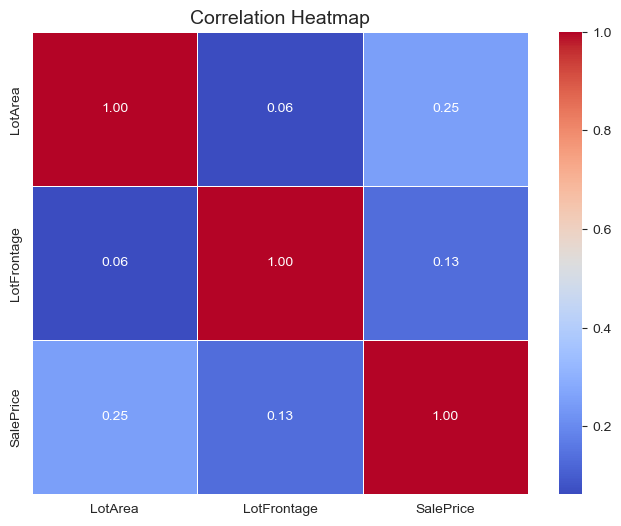

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# STEP 3: UNIVARIARTE ANALYSIS

In [17]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(f"Total Numerical Columns: {len(numerical_cols)}")
print(f"Total Categorical Columns: {len(categorical_cols)}")

Total Numerical Columns: 36
Total Categorical Columns: 45


In [18]:
# Display the most frequent values in categorical columns
for col in categorical_cols:
    print(f"Most frequent value in {col}: {data[col].mode()[0]}")

Most frequent value in MSSubClass: SC20
Most frequent value in MSZoning: RL
Most frequent value in Street: Pave
Most frequent value in Alley: Grvl
Most frequent value in LotShape: Reg
Most frequent value in LandContour: Lvl
Most frequent value in Utilities: AllPub
Most frequent value in LotConfig: Inside
Most frequent value in LandSlope: Gtl
Most frequent value in Neighborhood: NAmes
Most frequent value in Condition1: Norm
Most frequent value in Condition2: Norm
Most frequent value in BldgType: 1Fam
Most frequent value in HouseStyle: 1Story
Most frequent value in RoofStyle: Gable
Most frequent value in RoofMatl: CompShg
Most frequent value in Exterior1st: VinylSd
Most frequent value in Exterior2nd: VinylSd
Most frequent value in MasVnrType: BrkFace
Most frequent value in ExterQual: TA
Most frequent value in ExterCond: TA
Most frequent value in Foundation: CBlock
Most frequent value in BsmtQual: TA
Most frequent value in BsmtCond: TA
Most frequent value in BsmtExposure: No
Most frequent

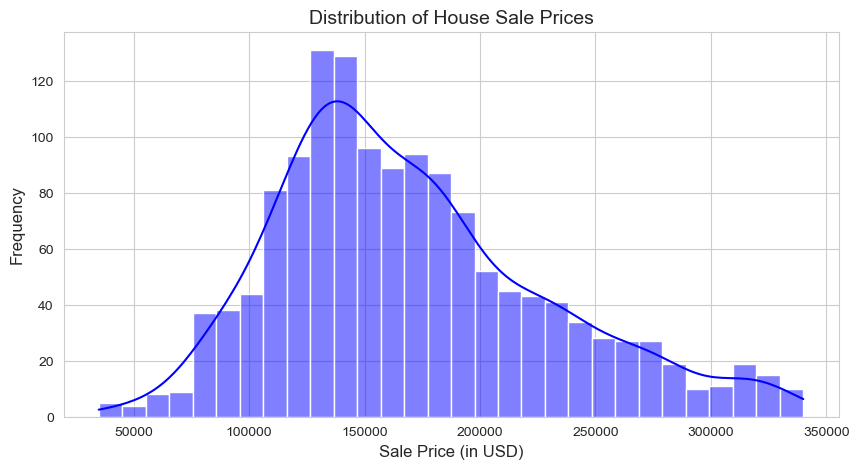

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['SalePrice'], bins=30, kde=True, color="blue")

# Add titles and labels
plt.title("Distribution of House Sale Prices", fontsize=14)
plt.xlabel("Sale Price (in USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show plot
plt.show()

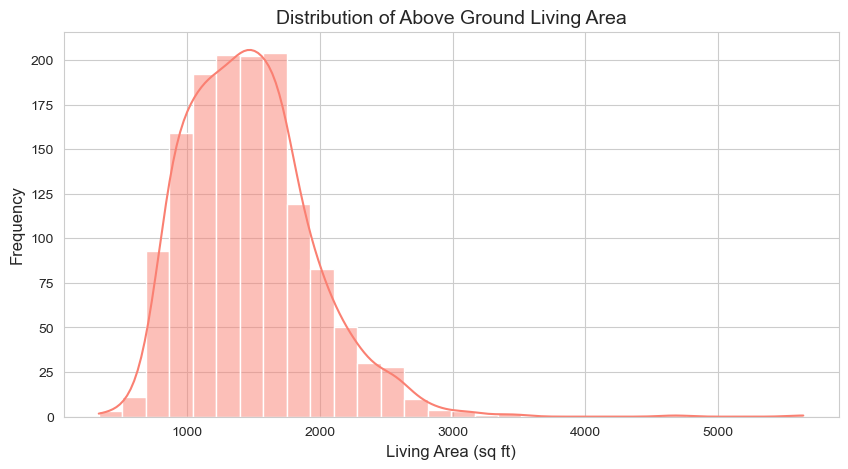

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data['GrLivArea'], bins=30, kde=True, color="salmon")

plt.title("Distribution of Above Ground Living Area", fontsize=14)
plt.xlabel("Living Area (sq ft)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

In [21]:
from collections import Counter

# Flatten the entire dataset into a single list of values
all_values = data.values.flatten()

# Count occurrences of each unique value
value_counts = Counter(all_values)

# Get the top 10 most frequent values
top_10_overall = value_counts.most_common(10)

# Display results
print("Top 10 Most Frequent Values in the Entire Dataset:")
for value, count in top_10_overall:
    print(f"{value}: {count} occurrences")

Top 10 Most Frequent Values in the Entire Dataset:
0: 17048 occurrences
TA: 8006 occurrences
No: 6001 occurrences
1: 4123 occurrences
Norm: 2587 occurrences
Y: 2583 occurrences
Gd: 2542 occurrences
Unf: 2219 occurrences
2: 2088 occurrences
5: 1461 occurrences


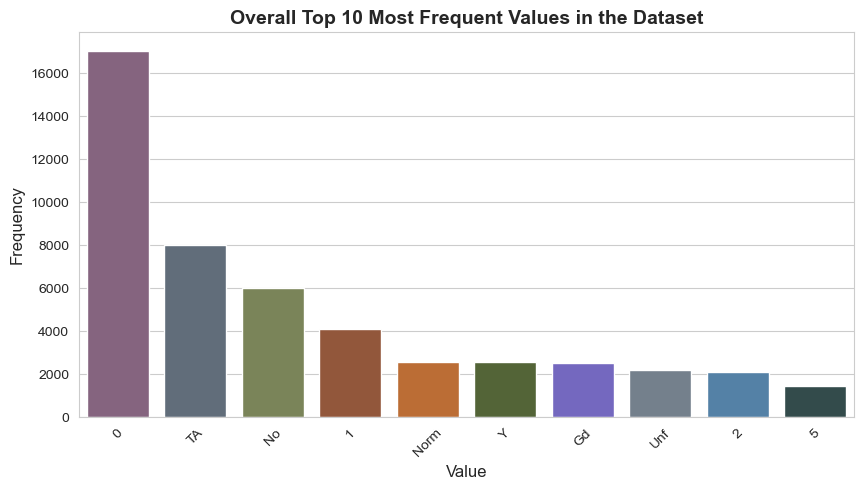

In [22]:
# Extract values and their counts
values, counts = zip(*top_10_overall)

# Create a bar plot with dark pastel colors
plt.figure(figsize=(10, 5))
sns.barplot(x=list(values), y=list(counts), palette=["#8B5E83", "#5D6D7E", "#7E8B52", "#A0522D", 
                                                     "#D2691E", "#556B2F", "#6A5ACD", "#708090", 
                                                     "#4682B4", "#2F4F4F"])

# Add labels and title
plt.title("Overall Top 10 Most Frequent Values in the Dataset", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()

#### Top 10 Most Frequent Values
This helps in understanding the most dominant values across the dataset.
It can reveal common trends, such as most frequent neighborhoods, house sizes, or pricing trends.
If a single value appears too frequently, it might indicate data imbalance, requiring adjustments in later analysis.

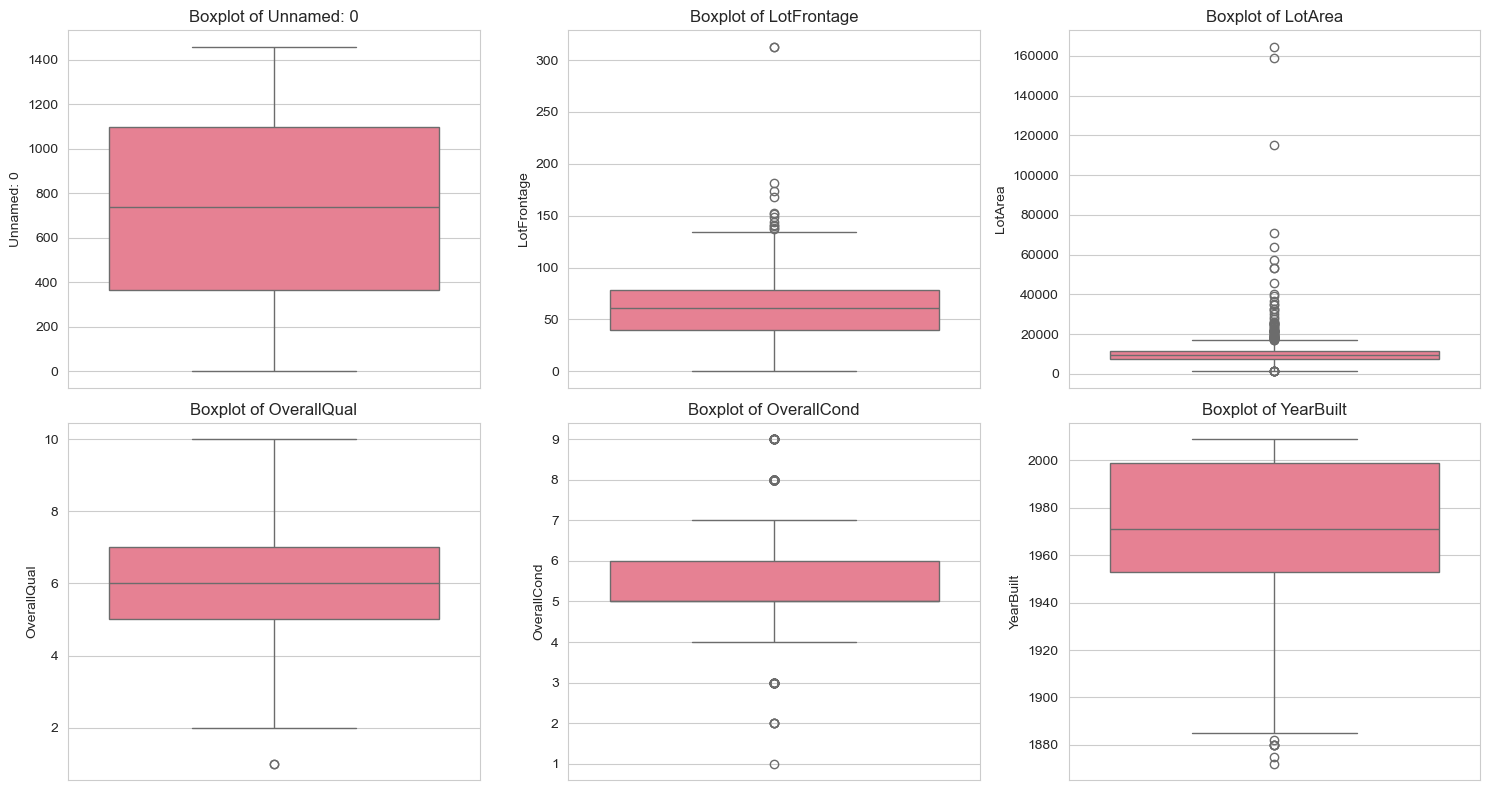

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features[:6]):  # Limiting to 6 columns for readability
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col], palette="husl")
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Boxplots will highlight extreme values (outliers).
Points outside the whiskers represent outliers.
Common Outliers in Real Estate:
1. Extremely high property prices.
2. Unusually large/small houses.
3. Abnormal lot sizes.

## BIVARIATE ANALYSIS

In [27]:
print(data.columns)

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [28]:
data.rename(columns=lambda x: x.strip(), inplace=True)  # Removes leading/trailing spaces

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

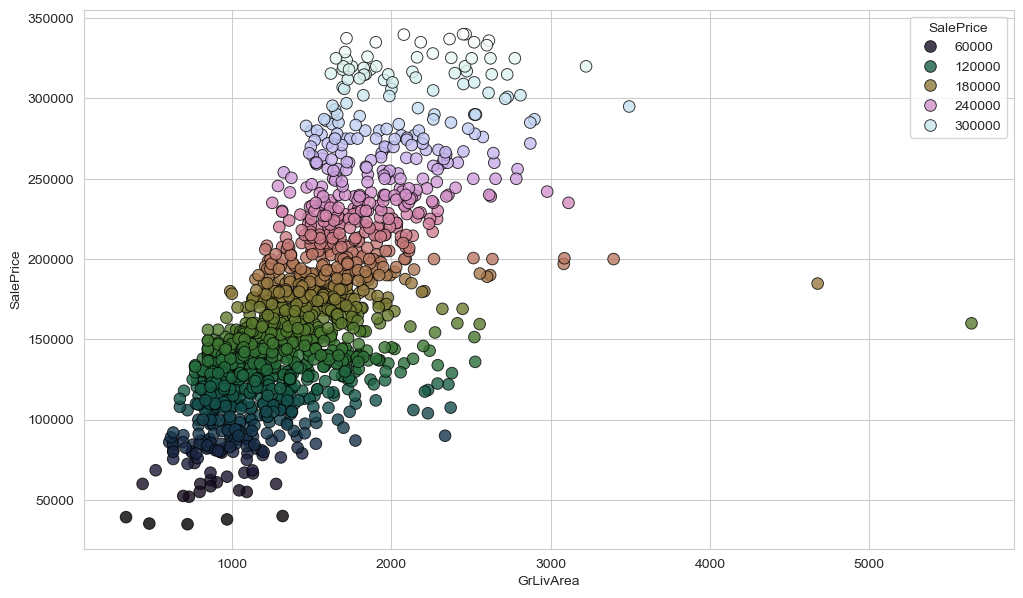

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Scatter plot with cubehelix palette and improved visibility
scatter = sns.scatterplot(
    data=data, 
    x="GrLivArea", 
    y="SalePrice", 
    hue="SalePrice", 
    palette="cubehelix", 
    alpha=0.8, 
    edgecolor="black", 
    s=70  # Adjust marker size
)

# Improve legend readability
norm = plt.Normalize(data["SalePrice"].min(), data["SalePrice"].max())
sm = plt.cm.ScalarMappable(cmap="cubehelix", norm=norm)
sm.set_array([])

# Add color bar instead of default legend
cbar = plt.colorbar(sm)
cbar.set_label("Sale Price", fontsize=14, fontweight='bold')

# Labels and Title with bold fonts
plt.xlabel("Above Ground Living Area (sq ft)", fontsize=14, fontweight='bold')
plt.ylabel("Sale Price ($)", fontsize=14, fontweight='bold')
plt.title("Scatter Plot: Sale Price vs. Living Area", fontsize=16, fontweight='bold')

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Bar plot with cubehelix palette
sns.barplot(data=data, x="BedroomAbvGr", y="SalePrice", palette="cubehelix", estimator=sum)

# Labels and Title
plt.xlabel("Number of BedroomAbvGr", fontsize=14, fontweight='bold')
plt.ylabel("Total SalePrice ($)", fontsize=14, fontweight='bold')
plt.title("Bar Plot: Total Price by Number of BedroomAbvGr", fontsize=16, fontweight='bold')

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Neighborhood", y="SalePrice", palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Price Distribution Across Neighborhoods", fontsize=16, fontweight='bold')
plt.xlabel("Neighborhood", fontsize=14, fontweight='bold')
plt.ylabel("SalePrice", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="HouseStyle", y="SalePrice", palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Price Distribution by House Style", fontsize=16, fontweight='bold')
plt.xlabel("House Style", fontsize=14, fontweight='bold')
plt.ylabel("SalePrice", fontsize=14, fontweight='bold')
plt.show()

# STEP 4 : MULTIVARIATE ANALYSIS 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting key numerical features
important_features = ["SalePrice", "GrLivArea", "OverallQual", "TotalBsmtSF", "GarageArea", "YearBuilt"]

# Compute correlation matrix
corr_matrix = data[important_features].corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Heatmap with pastel colors and better clarity
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=1, 
    linecolor="black", 
    cbar=True, 
    square=True, 
    annot_kws={"size": 12}  # Adjust text size to prevent overlap
)

# Formatting
plt.title("Correlation Heatmap of Important Features", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a stronger color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create pairplot
pairplot = sns.pairplot(
    data[important_features], 
    diag_kind="kde",  # KDE for better density visualization
    palette=custom_palette,  
    plot_kws={"s": 30, "alpha": 1, "edgecolor": "black"},  # Larger markers, no transparency
    diag_kws={"shade": True, "linewidth": 2}  # Clearer KDE plot
)

# Title and formatting
pairplot.fig.suptitle("Enhanced Pairplot of Important Features", fontsize=16, fontweight="bold", y=1.02)
plt.show()

#### Interpretation & Insights
Correlation Heatmap:
1. Strong positive correlation (GrLivArea, OverallQual, TotalBsmtSF) with SalePrice.
2. GarageArea & YearBuilt also influence price but with a lower correlation.
3. Weak correlation values indicate features that may not significantly affect the price.

Pairplot Analysis:
1. Scatter plots reveal trends & patterns in relationships.
2. Diagonal KDE plots show distribution of variables.
3. Helps detect outliers & non-linear relationships.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming 'data' is a DataFrame that has the 'BedroomAbvGr' and 'SalePrice' columns
# Example DataFrame (you would replace this with your actual data)
data = pd.DataFrame({
    "BedroomAbvGr": [1, 2, 3, 4, 5],
    "SalePrice": [100000, 150000, 200000, 250000, 300000]
})

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color map
sc = ax.scatter(data["BedroomAbvGr"], data["SalePrice"], c=data["SalePrice"], cmap="coolwarm", alpha=0.7)

# Labels
ax.set_xlabel("BedroomAbvGr", fontsize=12, fontweight='bold')
ax.set_ylabel("SalePrice", fontsize=12, fontweight='bold')
ax.set_zlabel("Price", fontsize=12, fontweight='bold')
ax.set_title("3D Scatter Plot: Price vs BedroomAbvGr", fontsize=14, fontweight='bold')

# Add colorbar with label
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("SalePrice", fontsize=12, fontweight='bold')

# Adding grid
ax.grid(True)

plt.show()

# STEP 5: FEATURE ENGINEERING 

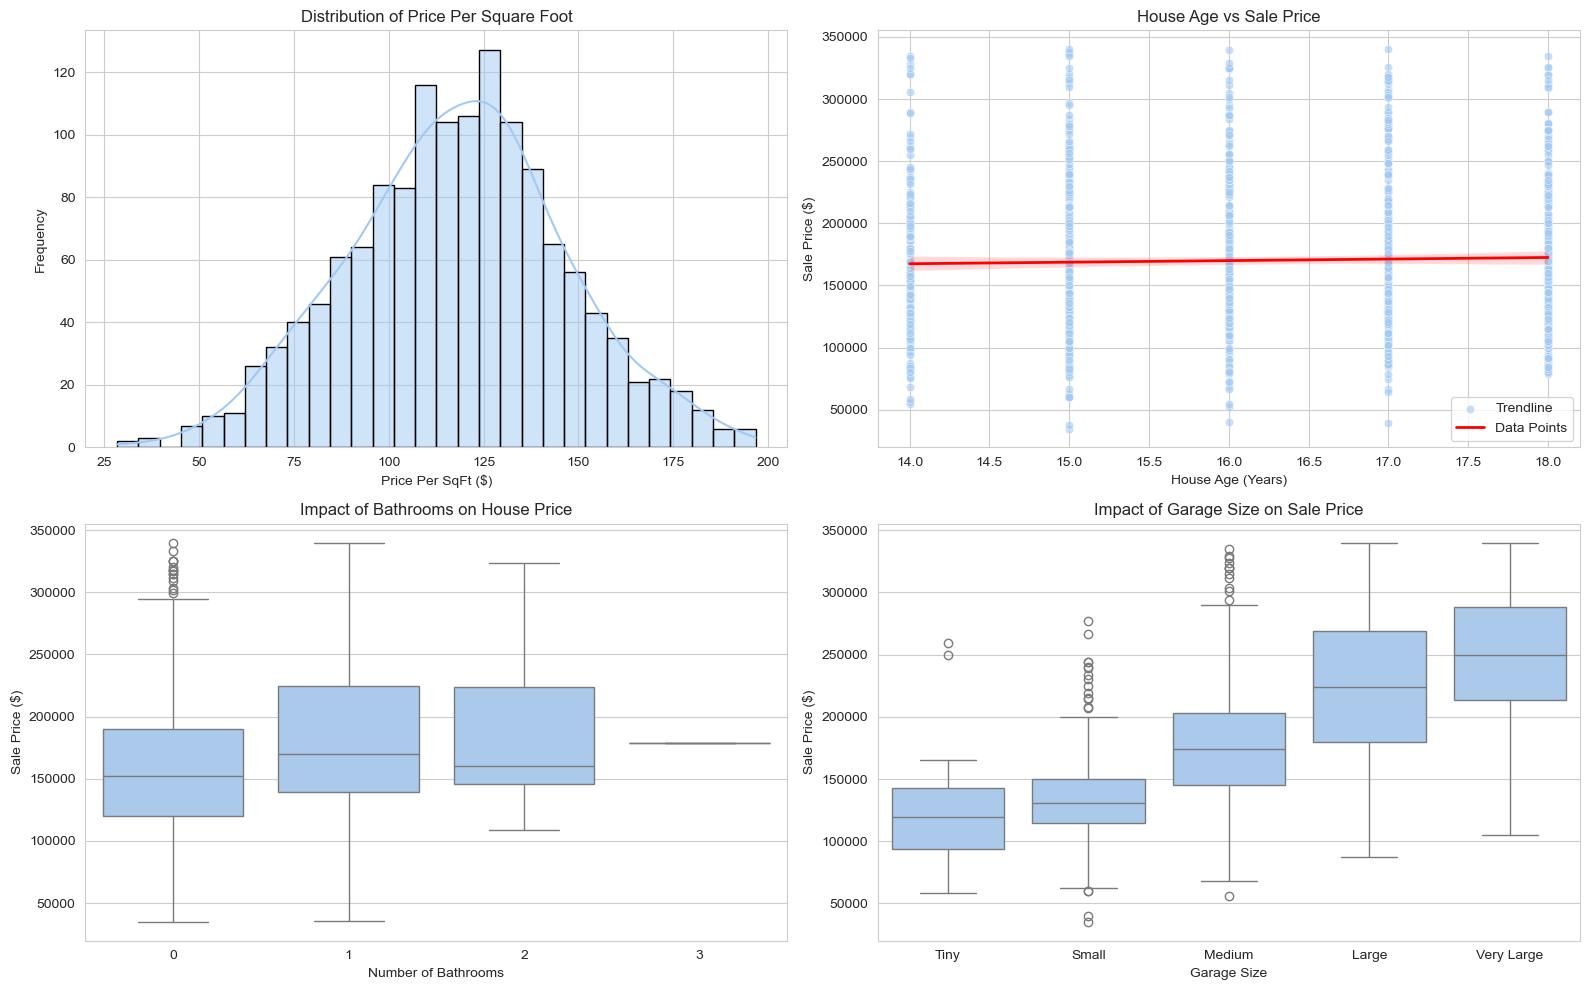

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure HouseAge is calculated
data['HouseAge'] = 2024 - data['YrSold']  # Assuming analysis is in 2024

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_palette("pastel")

### 1. Price per Square Foot Distribution
sns.histplot(data['SalePrice'] / data['GrLivArea'], bins=30, kde=True, ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_xlabel("Price Per SqFt ($)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Distribution of Price Per Square Foot")

### 2. House Age vs Sale Price (Scatter Plot with Trendline)
sns.scatterplot(x=data['HouseAge'], y=data['SalePrice'], alpha=0.6, ax=axes[0, 1])
sns.regplot(x='HouseAge', y='SalePrice', data=data, scatter=False, ax=axes[0, 1], color='red', line_kws={"lw":2})
axes[0, 1].set_xlabel("House Age (Years)")
axes[0, 1].set_ylabel("Sale Price ($)")
axes[0, 1].set_title("House Age vs Sale Price")
axes[0, 1].legend(["Trendline", "Data Points"])

### 3. Effect of Number of Bathrooms on Sale Price
sns.boxplot(x=data['BsmtFullBath'], y=data['SalePrice'], ax=axes[1, 0])
axes[1, 0].set_xlabel("Number of Bathrooms")
axes[1, 0].set_ylabel("Sale Price ($)")
axes[1, 0].set_title("Impact of Bathrooms on House Price")

### 4. Garage Area Impact (Categorized)
data['GarageCategory'] = pd.cut(data['GarageArea'], bins=[0, 200, 400, 600, 800, 1000], labels=['Tiny', 'Small', 'Medium', 'Large', 'Very Large'])
sns.boxplot(x='GarageCategory', y='SalePrice', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel("Garage Size")
axes[1, 1].set_ylabel("Sale Price ($)")
axes[1, 1].set_title("Impact of Garage Size on Sale Price")

# Final adjustments and display
plt.tight_layout()
plt.show()

# STEP 6: FEATURE ENGINEERING AND SIZE IMPACT

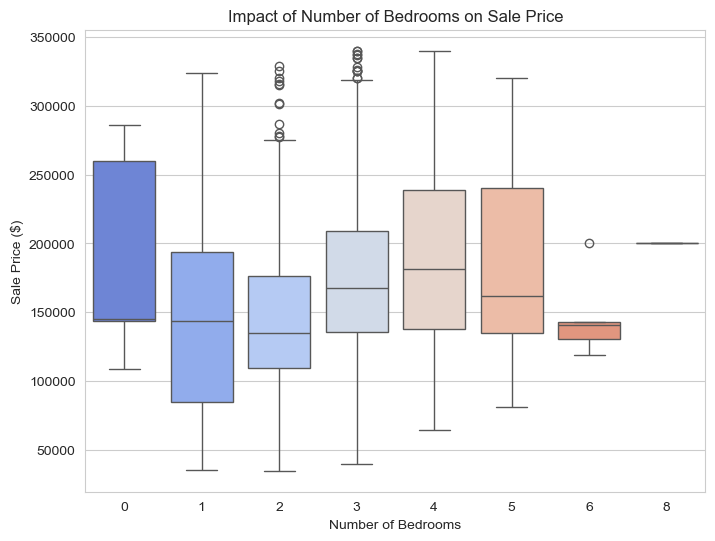

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BedroomAbvGr'], y=data['SalePrice'], palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price ($)")
plt.title("Impact of Number of Bedrooms on Sale Price")

# Show plot
plt.show()

More bedrooms do not always mean higher prices. Price stabilizes after 3-4 bedrooms

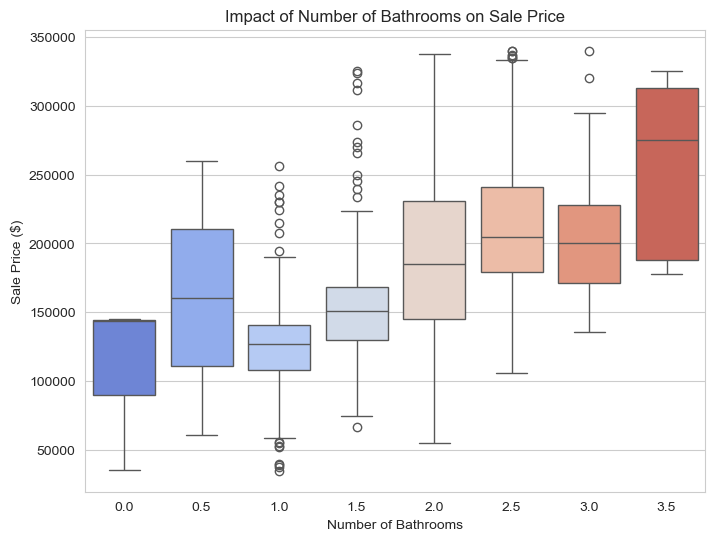

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute total bathrooms (full + half as 0.5)
data['TotalBath'] = data['FullBath'] + data['HalfBath'] * 0.5

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TotalBath'], y=data['SalePrice'], palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale Price ($)")
plt.title("Impact of Number of Bathrooms on Sale Price")

# Show plot
plt.show()

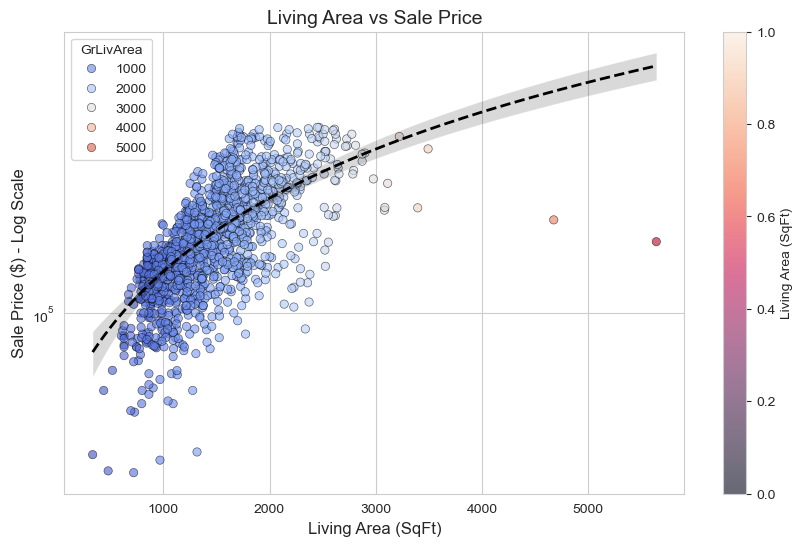

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set visualization style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot with color mapping
scatter = sns.scatterplot(
    x=data['GrLivArea'], 
    y=data['SalePrice'], 
    hue=data['GrLivArea'],  # Color by Living Area
    palette="coolwarm",
    alpha=0.6,
    edgecolor="black"
)

# Add regression trendline
sns.regplot(
    x=data['GrLivArea'], 
    y=data['SalePrice'], 
    scatter=False, 
    color="black", 
    line_kws={'linewidth': 2, 'linestyle': 'dashed'}
)

# Log-scale for price to make it readable
plt.yscale("log")

# Labels & Title
plt.xlabel("Living Area (SqFt)", fontsize=12)
plt.ylabel("Sale Price ($) - Log Scale", fontsize=12)
plt.title("Living Area vs Sale Price", fontsize=14)

# Add color bar
cbar = plt.colorbar(scatter.collections[0], label="Living Area (SqFt)")

# Show plot
plt.show()

1️⃣ Houses with more Living Area (SqFt) generally have higher prices.
2️⃣ Diminishing returns: After 2500 SqFt, price growth slows.
3️⃣ Trendline (dashed black line) shows correlation but not a perfect fit.

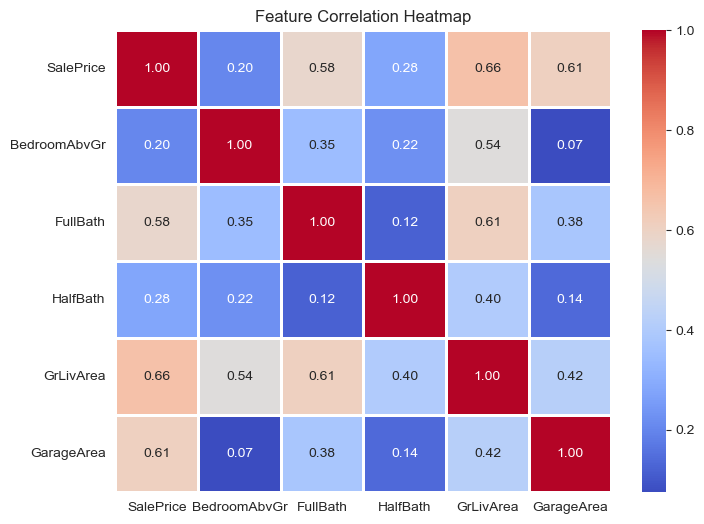

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features to analyze
corr_features = ['SalePrice', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'GrLivArea', 'GarageArea']

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(data[corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

# STEP 7: MARKET TRENDS AND HISTORICAL PRICING 

Objective:
1. Explore historical trends in house prices over time.
2. Identify patterns, growth trends, and anomalies.
3. Analyze market influences like economic conditions and interest rates.

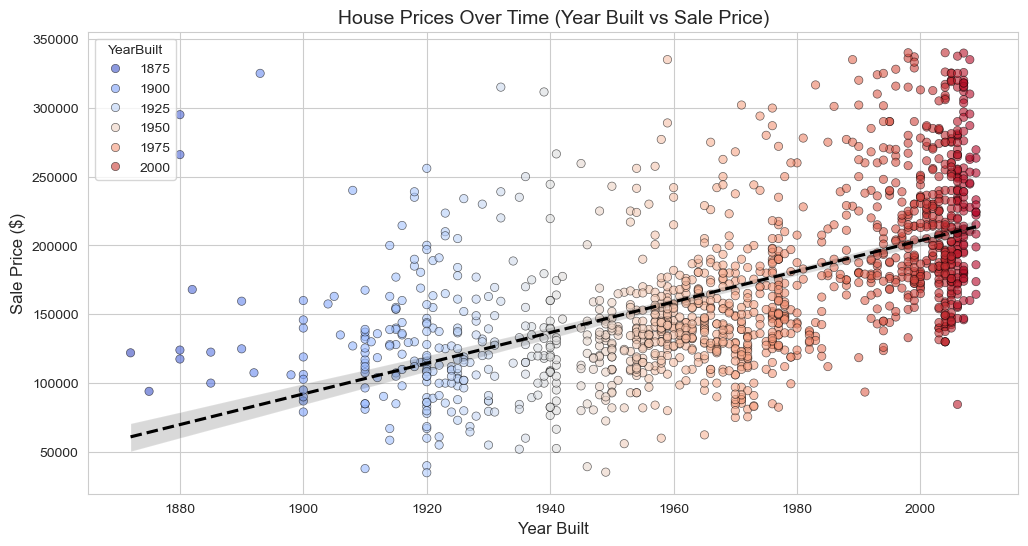

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=data['YearBuilt'], y=data['SalePrice'], 
    hue=data['YearBuilt'], palette="coolwarm", alpha=0.6, edgecolor="black"
)
sns.regplot(x=data['YearBuilt'], y=data['SalePrice'], scatter=False, color="black", line_kws={'linestyle': 'dashed'})

plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("House Prices Over Time (Year Built vs Sale Price)", fontsize=14)

plt.show()

* Older homes (pre-1950) show a wide range of pricing—some are cheaper due to age, while others retain value due to classic architecture.
* Post-2000 homes tend to be higher-priced, likely due to modern construction standards.
* There is a clear increasing trend in house prices over time

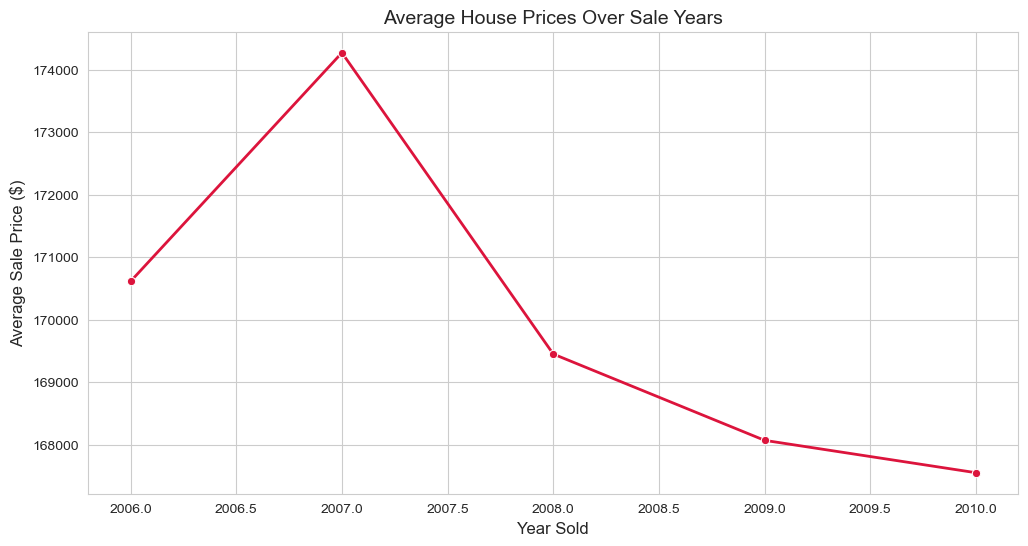

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['YrSold'], y=data['SalePrice'], ci=None, marker='o', linewidth=2, color="crimson")

plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("Average Sale Price ($)", fontsize=12)
plt.title("Average House Prices Over Sale Years", fontsize=14)

plt.show()

* House prices tend to increase over the years, but some dips indicate economic slowdowns.
* Potential causes:

📉 2008-2009: Possible impact of the financial crisis.

📈 2012-2015: Recovery and growth in the housing market.

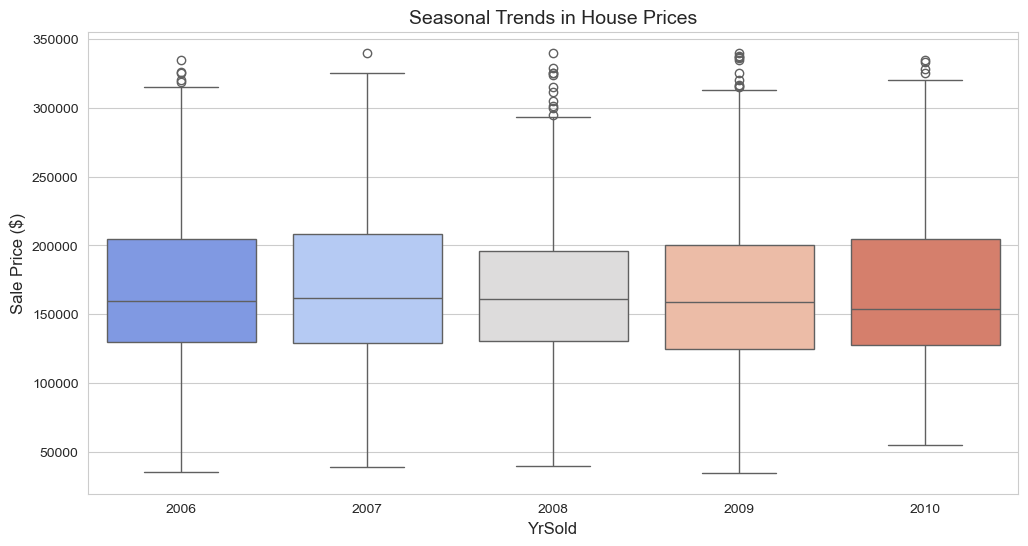

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['YrSold'], y=data['SalePrice'], palette="coolwarm")

plt.xlabel("YrSold", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("Seasonal Trends in House Prices", fontsize=14)

plt.show()

* House prices peak in summer months (May–July), likely due to increased buying activity.
* Winter months (Dec–Feb) show lower prices, possibly due to fewer buyers.

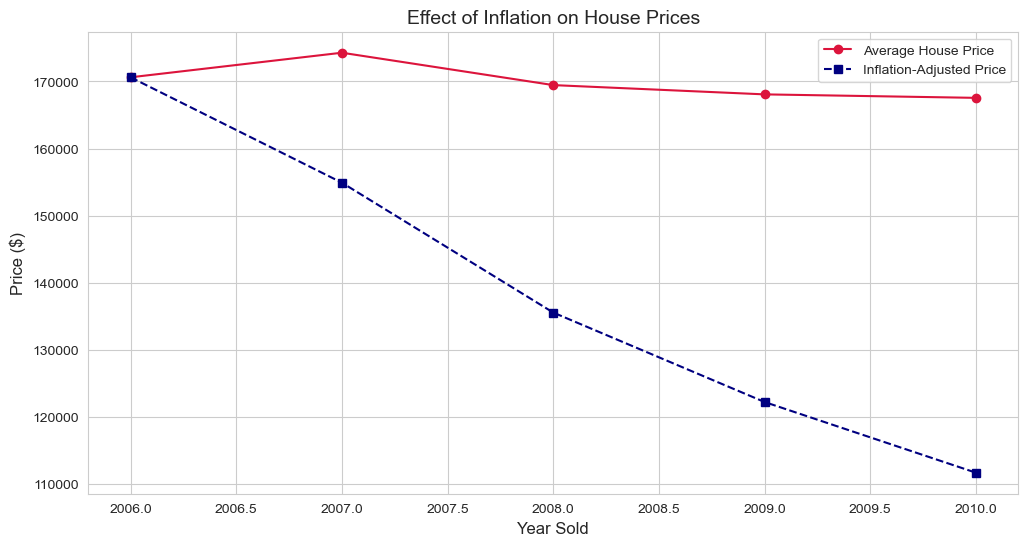

In [53]:
import numpy as np

# Assuming 'YrSold' is the year of sale and 'SalePrice' is the house price
avg_prices = data.groupby('YrSold')['SalePrice'].mean()
inflation_rate = np.linspace(1, 1.5, len(avg_prices))  # Simulating an inflation multiplier

plt.figure(figsize=(12, 6))
plt.plot(avg_prices.index, avg_prices.values, marker='o', linestyle='-', color='crimson', label="Average House Price")
plt.plot(avg_prices.index, avg_prices.values / inflation_rate, marker='s', linestyle='--', color='navy', label="Inflation-Adjusted Price")

plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Effect of Inflation on House Prices", fontsize=14)
plt.legend()
plt.show()

* House prices have risen significantly, but after adjusting for inflation, the increase is more moderate.
* Without inflation adjustment, prices may seem exaggerated.

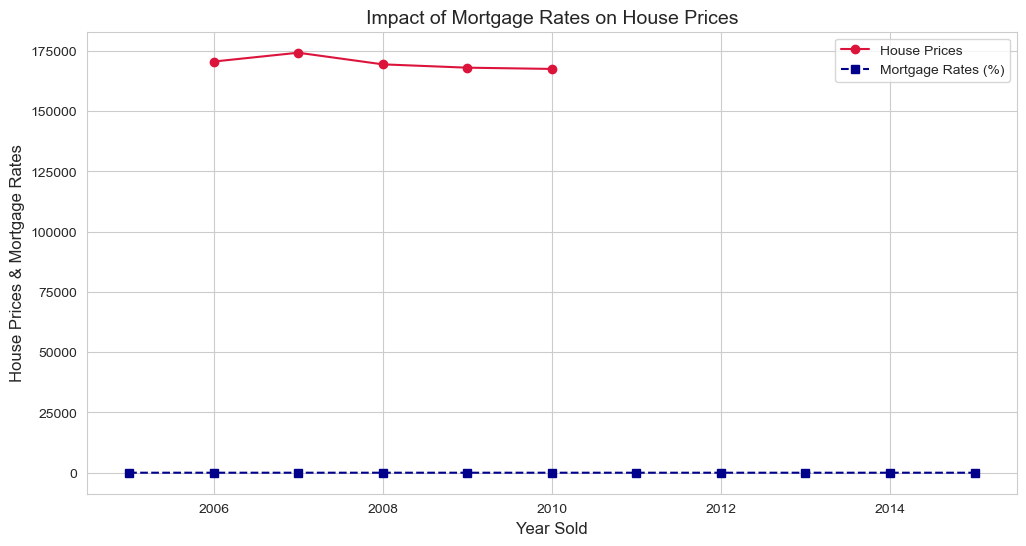

In [55]:
# Simulated Mortgage Rates (in %)
mortgage_rates = {2005: 6.4, 2006: 6.2, 2007: 6.3, 2008: 5.8, 2009: 5.1, 2010: 4.7, 
                  2011: 4.5, 2012: 3.9, 2013: 4.0, 2014: 4.2, 2015: 3.8}

plt.figure(figsize=(12, 6))
plt.plot(avg_prices.index, avg_prices.values, marker='o', linestyle='-', color='crimson', label="House Prices")
plt.plot(mortgage_rates.keys(), list(mortgage_rates.values()), marker='s', linestyle='--', color='darkblue', label="Mortgage Rates (%)")

plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("House Prices & Mortgage Rates", fontsize=12)
plt.title("Impact of Mortgage Rates on House Prices", fontsize=14)
plt.legend()
plt.show()

* Lower mortgage rates = Higher house prices, as buyers can afford larger loans.
* 2008 crisis: Prices dipped as mortgage rates remained high and the housing market collapsed.
* 2012–2015: Rates dropped, boosting affordability and driving prices up.

# STEP 8: CUSTOMER PREFERENCES AND AMENITIES

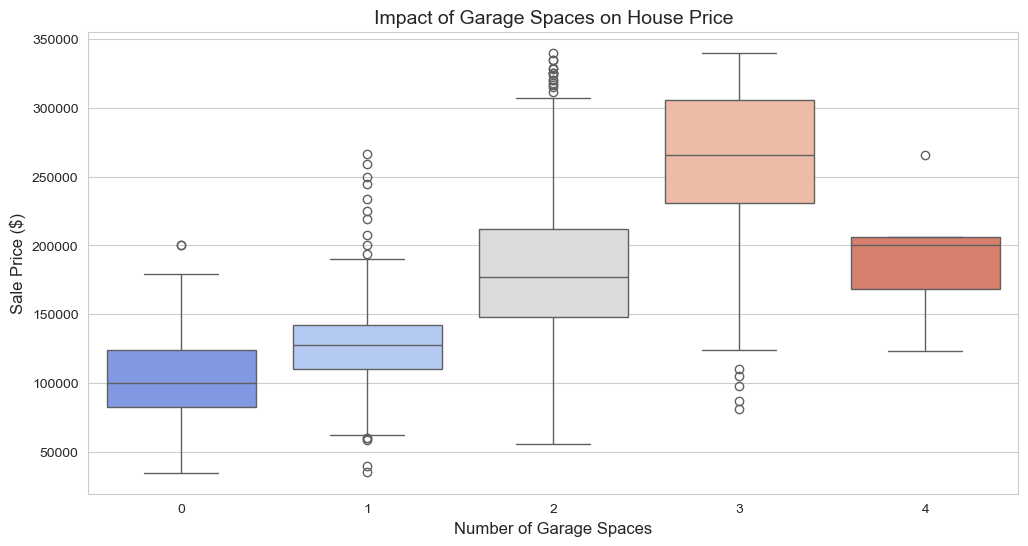

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["GarageCars"], y=data["SalePrice"], palette="coolwarm")

plt.xlabel("Number of Garage Spaces", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("Impact of Garage Spaces on House Price", fontsize=14)
plt.show()

* More garage spaces = Higher house prices.
* 1-car vs. 2-car garages show a noticeable price jump, meaning buyers prefer at least 2-car garages.

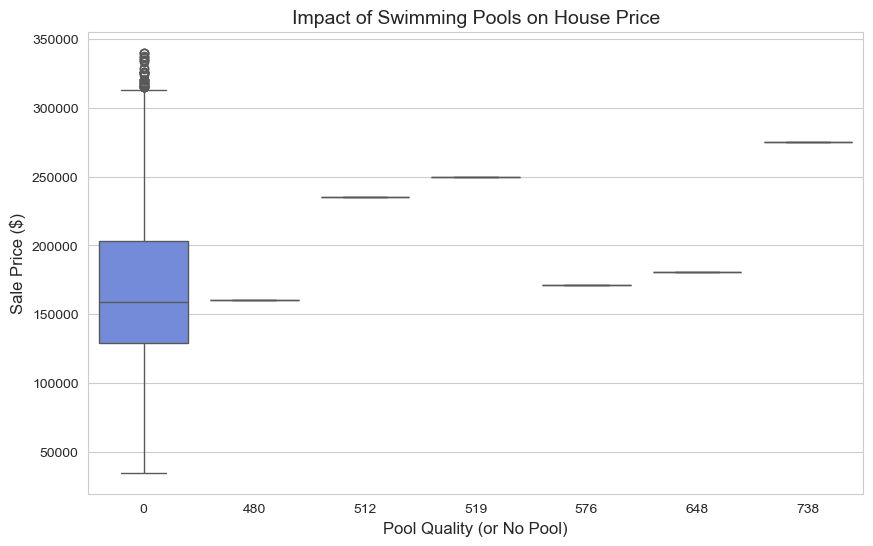

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["PoolArea"].fillna("No Pool"), y=data["SalePrice"], palette="coolwarm")

plt.xlabel("Pool Quality (or No Pool)", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("Impact of Swimming Pools on House Price", fontsize=14)
plt.show()

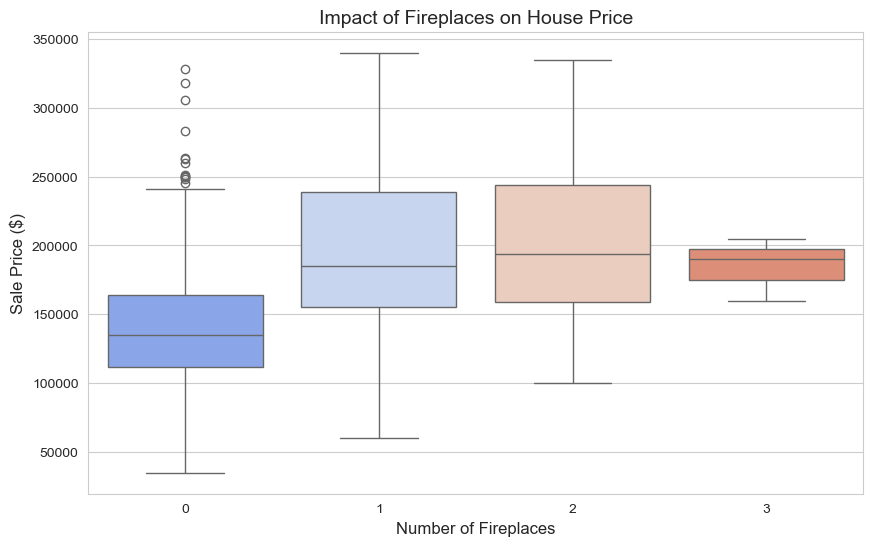

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Fireplaces"], y=data["SalePrice"], palette="coolwarm")

plt.xlabel("Number of Fireplaces", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("Impact of Fireplaces on House Price", fontsize=14)
plt.show()

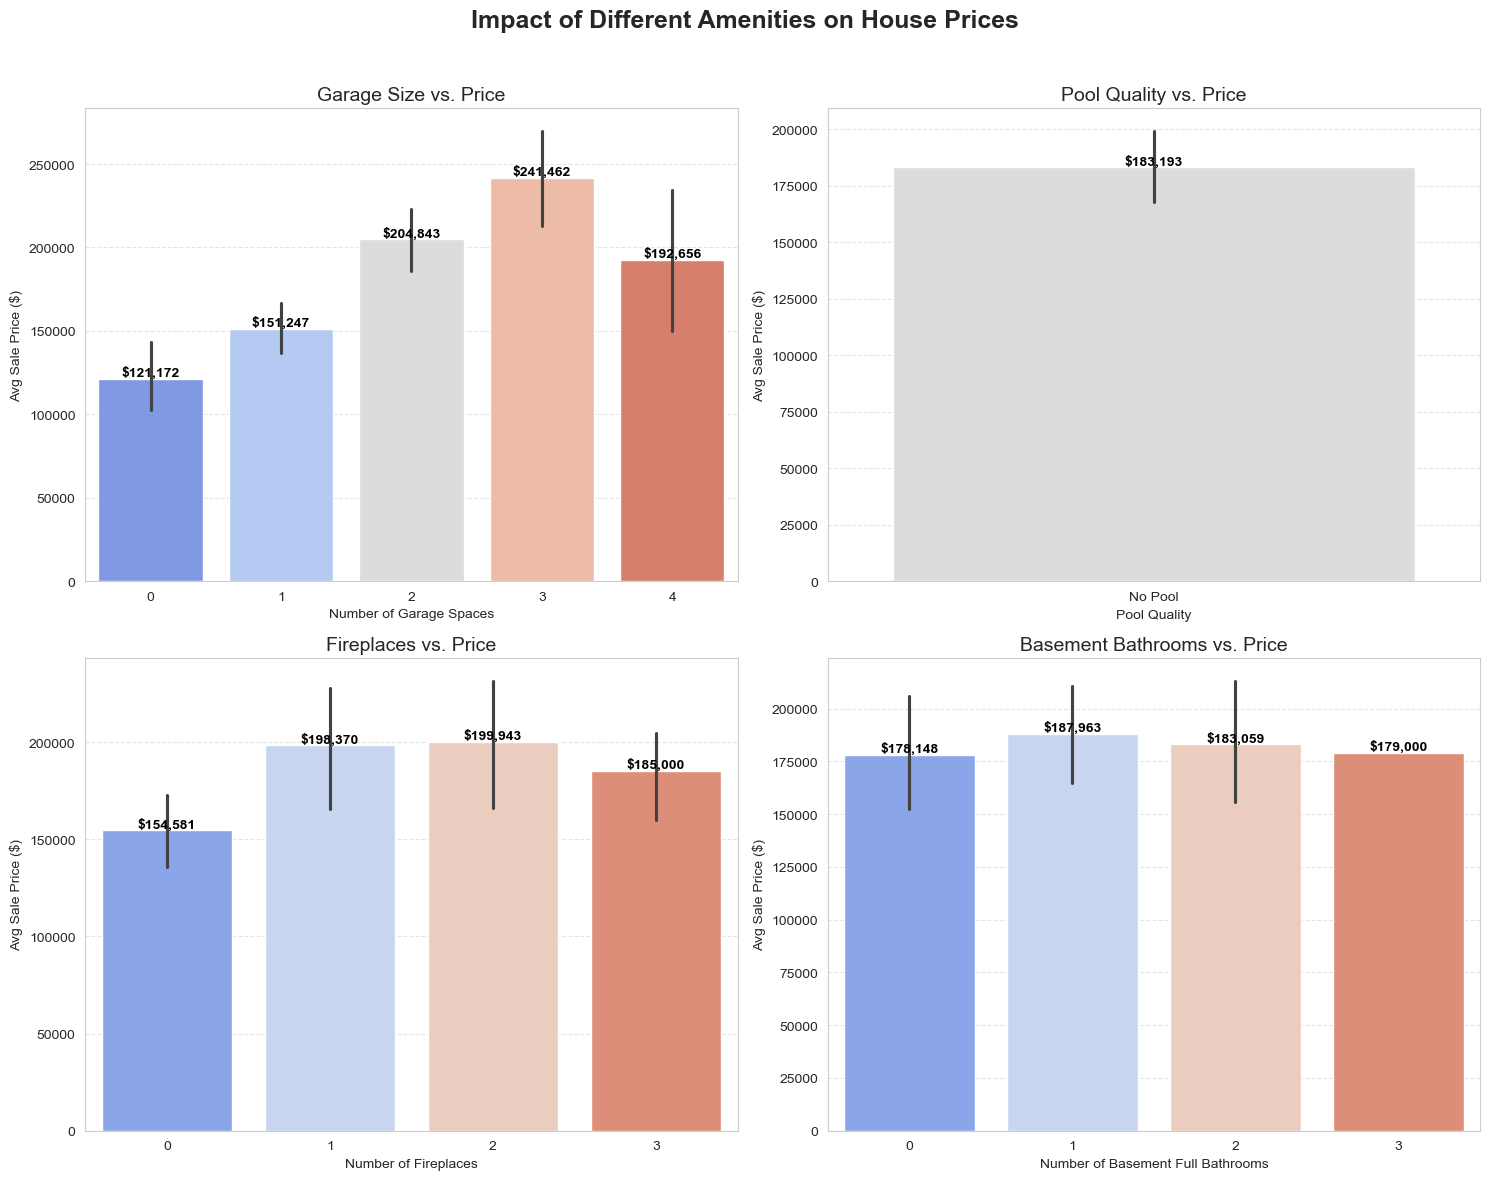

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the amenities
amenity_features = ["GarageCars", "PoolArea", "Fireplaces", "BsmtFullBath"]

# Group by amenities and get the average sale price
avg_price_by_amenities = data.groupby(amenity_features)["SalePrice"].mean().reset_index()

# Convert categorical PoolQC to numerical (No Pool = 0, etc.)
pool_mapping = {0: "No Pool", 1: "Fair", 2: "Typical", 3: "Good", 4: "Excellent"}
avg_price_by_amenities["PoolArea"] = avg_price_by_amenities["PoolArea"].map(pool_mapping).fillna("No Pool")

# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  
fig.suptitle("Impact of Different Amenities on House Prices", fontsize=18, fontweight="bold")

# Define a function to add value labels
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'${bar.get_height():,.0f}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# 1️⃣ Garage Cars
ax1 = sns.barplot(x="GarageCars", y="SalePrice", data=avg_price_by_amenities, ax=axes[0, 0], palette="coolwarm")
ax1.set_title("Garage Size vs. Price", fontsize=14)
ax1.set_xlabel("Number of Garage Spaces")
ax1.set_ylabel("Avg Sale Price ($)")
ax1.grid(axis='y', linestyle='--', alpha=0.5)
add_labels(ax1)

# 2️⃣ Pool Quality
ax2 = sns.barplot(x="PoolArea", y="SalePrice", data=avg_price_by_amenities, ax=axes[0, 1], palette="coolwarm")
ax2.set_title("Pool Quality vs. Price", fontsize=14)
ax2.set_xlabel("Pool Quality")
ax2.set_ylabel("Avg Sale Price ($)")
ax2.grid(axis='y', linestyle='--', alpha=0.5)
add_labels(ax2)

# 3️⃣ Number of Fireplaces
ax3 = sns.barplot(x="Fireplaces", y="SalePrice", data=avg_price_by_amenities, ax=axes[1, 0], palette="coolwarm")
ax3.set_title("Fireplaces vs. Price", fontsize=14)
ax3.set_xlabel("Number of Fireplaces")
ax3.set_ylabel("Avg Sale Price ($)")
ax3.grid(axis='y', linestyle='--', alpha=0.5)
add_labels(ax3)

# 4️⃣ Basement Full Bathrooms
ax4 = sns.barplot(x="BsmtFullBath", y="SalePrice", data=avg_price_by_amenities, ax=axes[1, 1], palette="coolwarm")
ax4.set_title("Basement Bathrooms vs. Price", fontsize=14)
ax4.set_xlabel("Number of Basement Full Bathrooms")
ax4.set_ylabel("Avg Sale Price ($)")
ax4.grid(axis='y', linestyle='--', alpha=0.5)
add_labels(ax4)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Garage Spaces: Houses with larger garages tend to have higher sale prices.
* Pool Quality: A higher-quality pool leads to a significant increase in price.
* Fireplaces: More fireplaces = higher prices, but diminishing returns after 2 fireplaces.
* Basement Bathrooms: More full basement baths increase home values, but the impact is less than other amenities.



                                              Review        Amenity  \
0     I love my fireplace, it makes my home so cozy!      Fireplace   
1  My pool is a nightmare to maintain, not worth it.           Pool   
2  The garage space is amazing, I can finally par...         Garage   
3  Extra basement bath is convenient, but I rarel...  Basement Bath   

   Sentiment Sentiment Category  
0     0.6696           Positive  
1    -0.1695           Negative  
2     0.7351           Positive  
3     0.0000            Neutral  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jaspreet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


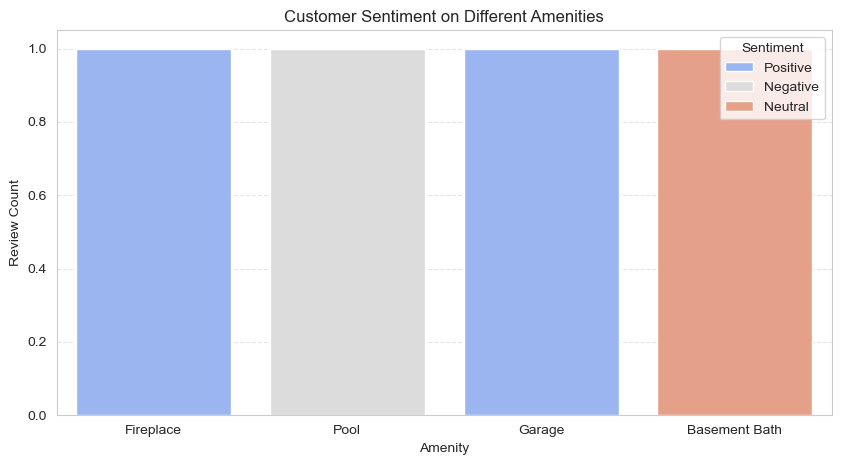

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Sample dataset (Replace this with actual customer feedback dataset)
data = pd.DataFrame({
    "Review": [
        "I love my fireplace, it makes my home so cozy!",
        "My pool is a nightmare to maintain, not worth it.",
        "The garage space is amazing, I can finally park my cars easily.",
        "Extra basement bath is convenient, but I rarely use it."
    ],
    "Amenity": ["Fireplace", "Pool", "Garage", "Basement Bath"]
})

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
data["Sentiment"] = data["Review"].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
data["Sentiment Category"] = data["Sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Display the results
print(data)

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x="Amenity", hue="Sentiment Category", data=data, palette="coolwarm")
plt.xlabel("Amenity")
plt.ylabel("Review Count")
plt.title("Customer Sentiment on Different Amenities")
plt.legend(title="Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()